Team F

Chouliaras Andreas 2143
Pappas Apostolos 2109

Malicious url detection using Ensemble methods

This notebook contains just the code, as simple as possible. Please refer to the report to understand it further.

It contains the models we kept and any algorithms that wasn't good enough to keep were discarded (SVM, Gausian NB, Bag of Words etc).

In [8]:
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
# Reading data from csv file
data = pd.read_csv("dataset_URLs.csv")
data.label[data.label == 'bad'] = '1'
data.label[data.label == 'good'] = '0'
data.head(20)

,url,label
0,diaryofagameaddict.com,1
1,espdesign.com.au,1
2,iamagameaddict.com,1
3,kalantzis.net,1
4,slightlyoffcenter.net,1
5,toddscarwash.com,1
6,tubemoviez.com,1
7,ipl.hk,1
8,crackspider.us/toolbar/install.php?pack=exe,1
9,pos-kupang.com/,1


In [3]:
urls=data.count().values[0]
mal_url=data[data.label == '1'].count().values[0]
safe_url=data[data.label == '0'].count().values[0]

print('Total number of Urls: ',urls)
print('Number of Malicious Urls: ',mal_url)
print('Number of Safe Urls: ',safe_url)

print('Percentage of Malicious Urls: ',100*mal_url/urls)
print('Percentage of Safe Urls: ',100*safe_url/urls)

Total number of Urls:  420464
Number of Malicious Urls:  75643
Number of Safe Urls:  344821
Percentage of Malicious Urls:  17.990363027512462
Percentage of Safe Urls:  82.00963697248754


In [4]:
# Labels
y = data["label"]

# Features
url_list = data["url"]

In [6]:
# Using Tokenizer
vectorizer = TfidfVectorizer()

# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)
print(X.shape)

(420464, 423927)


In [6]:
# Split into training and testing dataset 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(420464, 423927)
(336371, 423927)
(84093, 423927)
(336371,)
(84093,)


In [8]:
def confuse(y_test, y_pred):
    return pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(test, pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(test, pred)
        roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc_score(test, pred))
    plt.figure()
    plt.plot(fpr[1], tpr[1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.show()

# Non Ensemble

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Neural Net Accuracy_score:  98.03907578514264
Predicted      0      1    All
Actual                        
0          68752    377  69129
1           2597  12367  14964
All        71349  12744  84093
0.9104982873563334


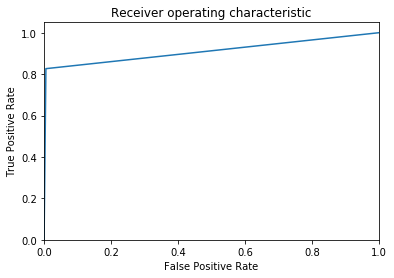

In [239]:
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=10, random_state=1)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)  
print('MLP Neural Net Accuracy_score: ',accuracy_score(y_test,predictions)*100)
print(confuse(y_test, predictions))
plot_roc(y_test.astype(int), predictions.astype(int))

KNeighbors Accuracy_score:  96.12690711474201
Predicted      0      1    All
Actual                        
0          68851     75  68926
1           3021  12146  15167
All        71872  12221  84093
0.9093416321051007


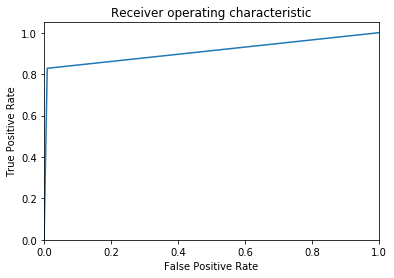

In [36]:
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, y_train)
y_knc = knc.predict(X_test)
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc)*100)
print(confuse(y_test,y_pred))
plot_roc(y_test.astype(int), y_knc.astype(int))

Random Forest Accuracy_score:  0.9709963968463486
Predicted      0      1    All
Actual                        
0          68657    269  68926
1           2170  12997  15167
All        70827  13266  84093
0.926511742566923


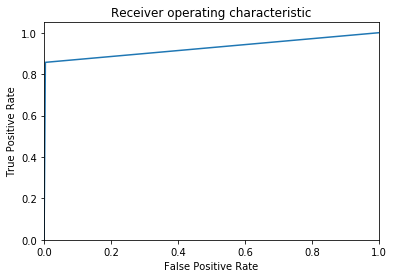

In [11]:
classifier = RandomForestClassifier(n_estimators=10,random_state=1)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)  
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_pred))
print(confuse(y_test, y_pred))
plot_roc(y_test.astype(int), y_pred.astype(int))

Logistic Regression Accuracy_score:  96.29576778090923
Predicted      0      1    All
Actual                        
0          68592    334  68926
1           2781  12386  15167
All        71373  12720  84093
0.9058978079334296


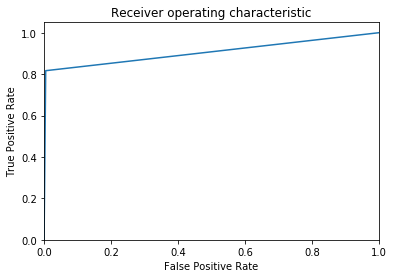

In [15]:
logreg = LogisticRegression(solver="saga", random_state=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy_score: ',accuracy_score(y_test,y_pred)*100)
print(confuse(y_test, y_pred))
plot_roc(y_test.astype(int), y_pred.astype(int))

Naive Bayes(Bernoulli):  95.11968891584317
Predicted      0      1    All
Actual                        
0          68689    237  68926
1           3867  11300  15167
All        72556  11537  84093
0.8708000501687084


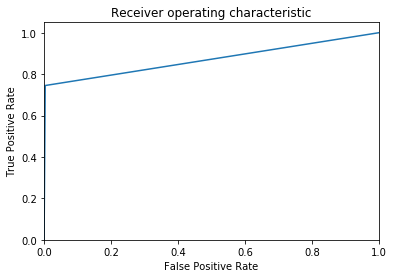

In [16]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print('Naive Bayes(Bernoulli): ',accuracy_score(y_test,y_pred)*100)
print(confuse(y_test, y_pred))
plot_roc(y_test.astype(int), y_pred.astype(int))

Naive Bayes(Multinomial):  96.31836181370626
Predicted      0      1    All
Actual                        
0          68851     75  68926
1           3021  12146  15167
All        71872  12221  84093
0.8998647204771854


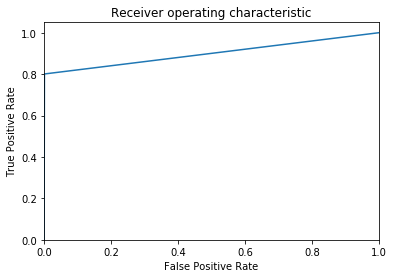

In [17]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print('Naive Bayes(Multinomial): ',accuracy_score(y_test,y_pred)*100)
print(confuse(y_test, y_pred))
plot_roc(y_test.astype(int), y_pred.astype(int))

# SVD

In [7]:
from sklearn.decomposition.truncated_svd import TruncatedSVD        
pca = TruncatedSVD(n_components=100)                                
X_reduced_train = pca.fit_transform(X)
print(X_reduced_train.shape)

(420464, 100)


In [39]:
# Split into training and testing dataset 80:20 ratio
a_train, a_test, b_train, b_test = train_test_split(X_reduced_train, y, test_size=0.2, random_state=1)

C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Neural Net Accuracy_score:  92.70688404504537
Predicted      0      1    All
Actual                        
0          67724   1202  68926
1           4931  10236  15167
All        72655  11438  84093
0.82872363684659


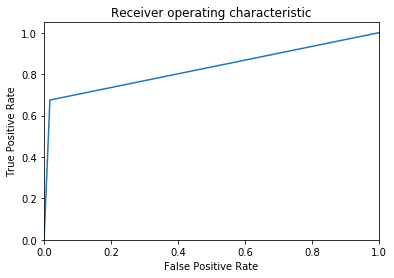

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=10, random_state=1)
mlp.fit(a_train, b_train)
y_mlp = mlp.predict(a_test)  
print('MLP Neural Net Accuracy_score: ',accuracy_score(b_test,y_mlp)*100)
print(confuse(b_test, y_mlp))
plot_roc(b_test.astype(int), y_mlp.astype(int))

KNeighbors Accuracy_score:  95.05785261555658
Predicted      0      1    All
Actual                        
0          67420   1506  68926
1           2650  12517  15167
All        70070  14023  84093
0.901714522765713


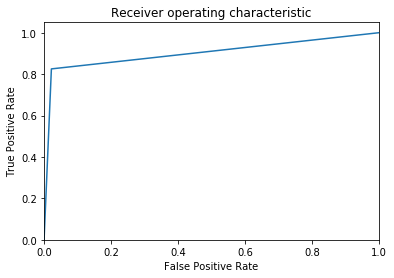

In [25]:
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(a_train, b_train)
y_knc = knc.predict(a_test)
print('KNeighbors Accuracy_score: ',accuracy_score(b_test,y_knc)*100)
print(confuse(b_test,y_knc))
plot_roc(b_test.astype(int), y_knc.astype(int))

Random Forest Accuracy_score:  96.80591725827358
Predicted      0      1    All
Actual                        
0          68142    784  68926
1           1902  13265  15167
All        70044  14049  84093
0.9316108225615571


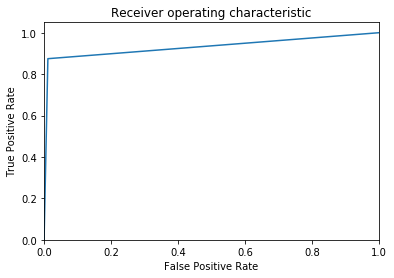

In [18]:
rtree = RandomForestClassifier(n_estimators=10,random_state=1)
rtree.fit(a_train, b_train)
b_pred = rtree.predict(a_test)  
print('Random Forest Accuracy_score: ',accuracy_score(b_test,b_pred)*100)
print(confuse(b_test,b_pred))
plot_roc(b_test.astype(int), b_pred.astype(int))

# Ensemble Neural Net

In [13]:
# MLP for the URL problem
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)

Using TensorFlow backend.


In [20]:
# Construct NN Train Set
y_logreg = logreg.predict(X_train)
y_mnb = mnb.predict(X_train)
y_bnb = bnb.predict(X_train)
y_rtree = rtree.predict(a_train) 
X_nn_train=np.vstack((y_logreg,y_mnb,y_bnb,y_rtree)).T
print(X_nn_train.shape)
# Construct NN Test Set
y_logreg = logreg.predict(X_test)
y_mnb = mnb.predict(X_test)
y_bnb = bnb.predict(X_test)
y_rtree = rtree.predict(a_test) 
X_nn_test=np.vstack((y_logreg,y_mnb,y_bnb,y_rtree)).T
print(X_nn_test.shape)

(336371, 4)
(84093, 4)


In [23]:
# create the model
model = Sequential()
model.add(Dense(50, input_dim=X_nn_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=X_nn_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_nn_train, y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 269096 samples, validate on 67275 samples
Epoch 1/10
269096/269096 [==============================] - 3s 13us/step - loss: 0.0475 - acc: 0.9843 - val_loss: 0.0078 - val_acc: 0.9913
Epoch 2/10
269096/269096 [==============================] - 3s 12us/step - loss: 0.0078 - acc: 0.9913 - val_loss: 0.0076 - val_acc: 0.9913
Epoch 3/10
269096/269096 [==============================] - 3s 12us/step - loss: 0.0078 - acc: 0.9913 - val_loss: 0.0076 - val_acc: 0.9913
Epoch 4/10
269096/269096 [==============================] - 3s 12us/step - loss: 0.0078 - acc: 0.9913 - val_loss: 0.0076 - val_acc: 0.9913
Epoch 5/10
269096/269096 [==============================] - 3s 12us/step - loss: 0.0078 - acc: 0.9913 - val_loss: 0.0077 - val_acc: 0.9913
Epoch 6/10
269096/269096 [==============================] - 3s 12us/step - loss: 0.0077 - acc: 0.9913 - val_loss: 0.0076 - val_acc: 0.9913
Epoch 7/10
269096/269096 [==============================] - 3s 12us/step - loss: 0.0077 - acc: 0.9913 - val_loss: 0

Accuracy: 97.61%
Predicted      0      1    All
Actual                        
0          68094    832  68926
1           1176  13991  15167
All        69270  14823  84093
0.9551961629654329


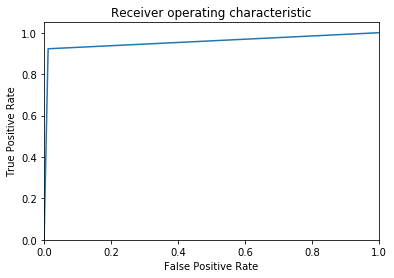

In [24]:
# Final evaluation of the model
scores = model.evaluate(X_nn_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
nn_pred = model.predict_classes(X_nn_test) 
print(confuse(y_test,nn_pred.ravel()))
plot_roc(y_test.astype(int), nn_pred.astype(int))

In [42]:
def metra(tp,fp,tn,fn):
    precision= tp/(tp+fp)
    recall=tp/(tp+fn)
    f1=2*(precision*recall)/(precision+recall)
    print("Precision: ", precision)
    print("Recall:    ", recall)
    print("F1 score:  ", f1)

metra(12367,377,68752,2597)

Precision:  0.9704174513496547
Recall:     0.8264501470195135
F1 score:   0.8926663779413887


| Algorithm    | Precision | Recall | F1 score | AUC   | Accuracy |
|-|-|-|-|-|-|
| Logistic     | 0.973     | 0.816  | 0.888    | 0.905 | 96.3     |
| MLP          | 0.97      | 0.826  | 0.892    | 0.910 | 98.04    |
| MLP (SVD)    | 0.895     | 0.674  | 0.769    | 0.828 | 92.7     |
| KNN          | 0.993     | 0.801  | 0.886    | 0.909 | 96.12    |
| RndFrst      | 0.979     | 0.856  | 0.914    | 0.926 | 97.1     |
| NB Bernoulli | 0.979     | 0.745  | 0.846    | 0.871 | 95.12    |
| NB Multin    | 0.993     | 0.801  | 0.887    | 0.899 | 96.32    |
| KNN (SVD)    | 0.892     | 0.825  | 0.857    | 0.901 | 95.58    |
| RndFrst(SVD) | 0.944     | 0.874  | 0.908    | 0.931 | 96.8     |
| Ensemble NN  | 0.943     | 0.922  | 0.933    | 0.955 | 97.61    |
